In [2]:
from Architectures.AE import AE1
from Data.load import load
import numpy as np
from Metrics.metrics import SSIM
import json
from matplotlib import pyplot as plt
from Tests.information import classifier_test

In this notebook I check what the minimum amount of channels needed for each conv layer is. To find this, I first scale up the number of channels until it stops increasing accuracy of a classifier. This happens around the point (16, 32, 64). From here, we can lower the number of channels in each layer, starting with 64 and go as low as we can without decreasing the score of the classifier. Every model compresses the images with the same compression ratio (same latent space cardinality), so we are only looking at the necessary channels to achieve satisfactory compression under this compression ratio. I have chosen 256 as the dimensionality in question.

In [3]:
train, test = load("Pre-processed/CN", take=100)

Loading CN: 100%|██████████| 100/100 [00:37<00:00,  2.67it/s]


In [ ]:
# To keep things comparable, each structure should use the same number of layers.
structures = [
    # To figure out the minimum amount of channels we can first "blow up" the parameters and see when that stops working
    # and work backwards to see when the score starts to decrease again.
    # (1, 1, 1),
    # (1, 2, 4),
    # (2, 4, 8),
    # (4, 8, 16),
    # (8, 16, 32),
    # (16, 32, 64),
    # (32, 64, 128),
    # (64, 128, 256),
    # (128, 256, 512), # Yet to be computed: my computer could not handle this :(

    # Round number 2: trying to minimize the number of dimensions until we see a change in SSIM
    # (10, 32, 64),
    # (8, 32, 64),
    # (4, 32, 64),
    # (2, 32, 64),
    # (1, 32, 64)
    
    # Round number 2.2:
    # (4, 20, 64),
    # (4, 16, 64),
    # (4, 12, 64),
    # (4, 8, 64),
    # (4, 4, 64),
    # (4, 2, 64),
    # (4, 1, 64),
]


with open("Cache/test_optimal_depths.json", "r") as f: # Log results in case we run OOM
    scores = json.load(f)

for structure in structures:
    ae = AE1(train.shape, structure, latent_dim = 256) # Every structure is compressed to the same space.
    hist = ae.train(train, epochs = 100)
    pred = ae.decode(ae.encode(test))
    scores[str(structure)] = {
        "SSIM":SSIM(pred.reshape(test.shape), test),
        # "MSE":hist.history['val_loss'][-1],
        "val_loss":hist.history['val_loss']
    }
    
    with open("Cache/test_optimal_depths.json", "w") as f: # Log results in case we run OOM
        json.dump(scores, f)
    ae.save(f"Trained Models/AE/optimal_depths/{structure}")
    # break

Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 10, 12, 10, 64)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,697,972 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,885,109 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,583,081 (151.00 MB)

 Trainable params: 39,583,081 (151.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 725ms/step - loss: 0.1230 - val_loss: 0.0606
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 648ms/step - loss: 0.0560 - val_loss: 0.0320
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step - loss: 0.0319 - val_loss: 0.0231
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 626ms/step - loss: 0.0246 - val_loss: 0.0216
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 644ms/step - loss: 0.0228 - val_loss: 0.0201
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - loss: 0.0210 - val_loss: 0.0202
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 626ms/step - loss: 0.0198 - val_loss: 0.0175
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - loss: 0.0179 - val_loss: 0.0164
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - loss: 0.0161 - val_loss: 0.0145
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - loss: 0.0150 - val_loss: 0.0137
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 627ms/step - loss: 0.0142 - val_loss: 0.0130
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,877,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,568,385 (150.94 MB)

 Trainable params: 39,568,385 (150.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 634ms/step - loss: 0.0848 - val_loss: 0.0284
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 571ms/step - loss: 0.0489 - val_loss: 0.0601
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - loss: 0.0560 - val_loss: 0.0436
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 572ms/step - loss: 0.0362 - val_loss: 0.0296
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 581ms/step - loss: 0.0282 - val_loss: 0.0245
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 639ms/step - loss: 0.0225 - val_loss: 0.0195
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - loss: 0.0190 - val_loss: 0.0171
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - loss: 0.0170 - val_loss: 0.0147
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 646ms/step - loss: 0.0153 - val_loss: 0.0130
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 654ms/step - loss: 0.0134 - val_loss: 0.0118
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,683,276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,870,413 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,553,689 (150.89 MB)

 Trainable params: 39,553,689 (150.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 676ms/step - loss: 0.0802 - val_loss: 0.0320
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - loss: 0.0322 - val_loss: 0.0251
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step - loss: 0.0260 - val_loss: 0.0221
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - loss: 0.0221 - val_loss: 0.0183
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - loss: 0.0191 - val_loss: 0.0166
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - loss: 0.0171 - val_loss: 0.0145
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step - loss: 0.0149 - val_loss: 0.0123
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 591ms/step - loss: 0.0128 - val_loss: 0.0107
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 595ms/step - loss: 0.0098 - val_loss: 0.0083
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 628ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 630ms/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,675,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,863,065 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,538,993 (150.83 MB)

 Trainable params: 39,538,993 (150.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - loss: 0.0787 - val_loss: 0.0633
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - loss: 0.0646 - val_loss: 0.0431
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - loss: 0.0369 - val_loss: 0.0283
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 571ms/step - loss: 0.0271 - val_loss: 0.0220
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - loss: 0.0220 - val_loss: 0.0201
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step - loss: 0.0201 - val_loss: 0.0174
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - loss: 0.0178 - val_loss: 0.0162
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - loss: 0.0163 - val_loss: 0.0145
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 574ms/step - loss: 0.0150 - val_loss: 0.0134
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 571ms/step - loss: 0.0137 - val_loss: 0.0125
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step - loss: 0.0130 - val_loss: 0.0115
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 570ms/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,668,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,855,717 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,524,297 (150.77 MB)

 Trainable params: 39,524,297 (150.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - loss: 0.0708 - val_loss: 0.0423
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 551ms/step - loss: 0.0369 - val_loss: 0.0251
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - loss: 0.0262 - val_loss: 0.0243
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - loss: 0.0232 - val_loss: 0.0190
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - loss: 0.0196 - val_loss: 0.0172
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 552ms/step - loss: 0.0176 - val_loss: 0.0157
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 565ms/step - loss: 0.0160 - val_loss: 0.0141
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - loss: 0.0140 - val_loss: 0.0123
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - loss: 0.0125 - val_loss: 0.0111
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 555ms/step - loss: 0.0115 - val_loss: 0.0099
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 546ms/step - loss: 0.0101 - val_loss: 0.0093
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,664,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,852,043 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,516,949 (150.75 MB)

 Trainable params: 39,516,949 (150.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - loss: 0.0855 - val_loss: 0.0721
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 550ms/step - loss: 0.0788 - val_loss: 0.0456
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - loss: 0.0449 - val_loss: 0.0286
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - loss: 0.0300 - val_loss: 0.0243
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - loss: 0.0238 - val_loss: 0.0187
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - loss: 0.0197 - val_loss: 0.0162
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - loss: 0.0173 - val_loss: 0.0142
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 538ms/step - loss: 0.0143 - val_loss: 0.0122
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - loss: 0.0125 - val_loss: 0.0102
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - loss: 0.0109 - val_loss: 0.0091
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - loss: 0.0

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 256)            │    19,663,069 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │    19,850,206 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,513,275 (150.73 MB)

 Trainable params: 39,513,275 (150.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 647ms/step - loss: 0.0872 - val_loss: 0.0349
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 583ms/step - loss: 0.0587 - val_loss: 0.0488
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - loss: 0.0514 - val_loss: 0.0248
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - loss: 0.0291 - val_loss: 0.0223
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 544ms/step - loss: 0.0253 - val_loss: 0.0201
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - loss: 0.0219 - val_loss: 0.0189
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0196 - val_loss: 0.0173
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0179 - val_loss: 0.0162
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 532ms/step - loss: 0.0163 - val_loss: 0.0144
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - loss: 0.0148 - val_loss: 0.0137
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0138 - val_loss: 0.0123
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0

In [ ]:
# Since we logged the output of the previous cell we can just read from cache ;)
with open("Cache/test_optimal_depths.json", "r") as f:
    scores = json.load(f)

: 

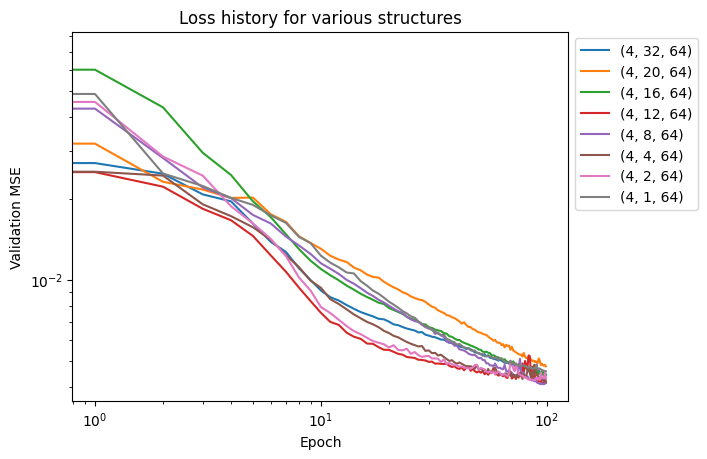

In [20]:
# Check out the loss history
for structure in scores:
    if "64)" not in structure or "(4" not in structure: continue
    if scores[structure] is None: continue
    plt.plot(scores[structure]["val_loss"], label = structure)

plt.title("Loss history for various structures")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc="upper left",bbox_to_anchor=(1, 0.5, 0.5, 0.5))

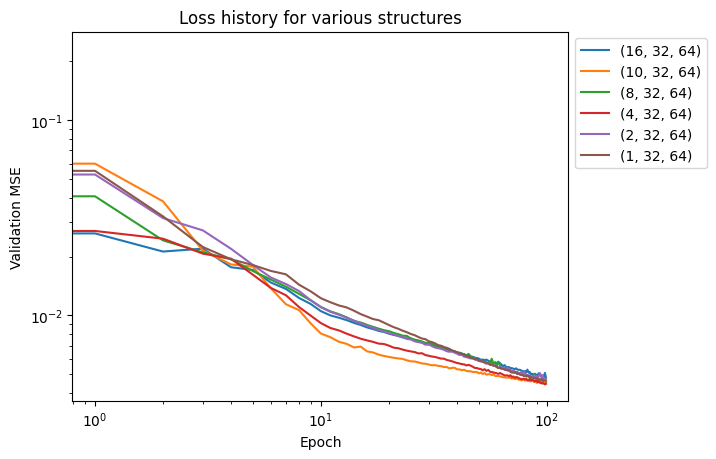

In [14]:
# Check out the loss history
for structure in scores:
    if "32, 64)" not in structure: continue
    if scores[structure] is None: continue
    plt.plot(scores[structure]["val_loss"], label = structure)

plt.title("Loss history for various structures")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc="upper left",bbox_to_anchor=(1, 0.5, 0.5, 0.5))

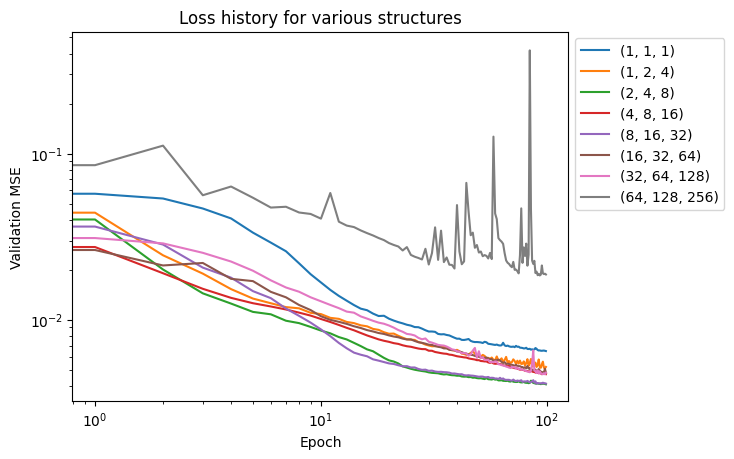

In [ ]:
# Check out the loss history
for structure in scores:
    if scores[structure] is None: continue
    plt.plot(scores[structure]["val_loss"], label = structure)

plt.title("Loss history for various structures")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Epoch")
plt.ylabel("Validation MSE")
plt.legend(loc="upper left",bbox_to_anchor=(1, 0.5, 0.5, 0.5))

Here we see something fascinating: the largest models do not seem to converge. This could be due to exploding gradients, which could be resolved with l2 regularization and batch normalization layers.

In [21]:
{s:scores[s]["SSIM"] for s in scores if scores[s]}

{'(1, 1, 1)': 0.5481646788930402,
 '(1, 2, 4)': 0.6105361137947669,
 '(2, 4, 8)': 0.6844198625535345,
 '(4, 8, 16)': 0.7137382020981196,
 '(8, 16, 32)': 0.726889971288021,
 '(16, 32, 64)': 0.7338224314763475,
 '(32, 64, 128)': 0.7106755052219722,
 '(64, 128, 256)': 0.45270871577006866,
 '(10, 32, 64)': 0.7232055781477023,
 '(8, 32, 64)': 0.6948481760875271,
 '(4, 32, 64)': 0.7281281068702393,
 '(2, 32, 64)': 0.7101968072725728,
 '(1, 32, 64)': 0.7061424081888246,
 '(4, 20, 64)': 0.7064010298537244,
 '(4, 16, 64)': 0.7229336531378302,
 '(4, 12, 64)': 0.6714029447472548,
 '(4, 8, 64)': 0.7351864961573773,
 '(4, 4, 64)': 0.7372518086432723,
 '(4, 2, 64)': 0.718069355900418,
 '(4, 1, 64)': 0.6870814361894572}

We see that the highest scoring structure is (16, 32, 64)

In [7]:
ae = AE1.open("Trained Models/AE/optimal_depths/(16, 32, 64)")

Models loaded and compiled successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


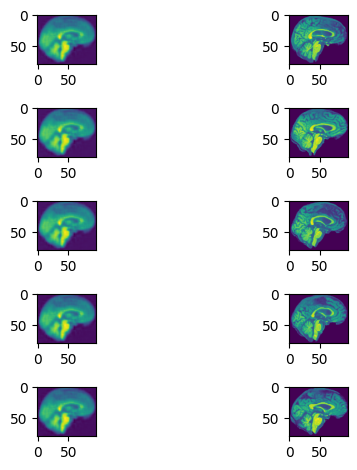

In [60]:
latent = ae.encode(test)
recon = ae.decode(latent)
display_amount = 5
for test_idx in range(display_amount):
    plt.subplot(display_amount,2,1+2*test_idx)
    plt.imshow(np.rot90(recon[test_idx][40]))
    plt.subplot(display_amount,2,2+2*test_idx)
    plt.imshow(np.rot90(test[test_idx][40]))

plt.tight_layout()

Since all the images look the same, I suspect we have lost a lot of structural information. If so, we will not be able to classify the different groups with high accuracy. To do this we can train a classifier on the latent space of the autoencoder. This is done with the `classifier_test` api.

Loading AD: 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


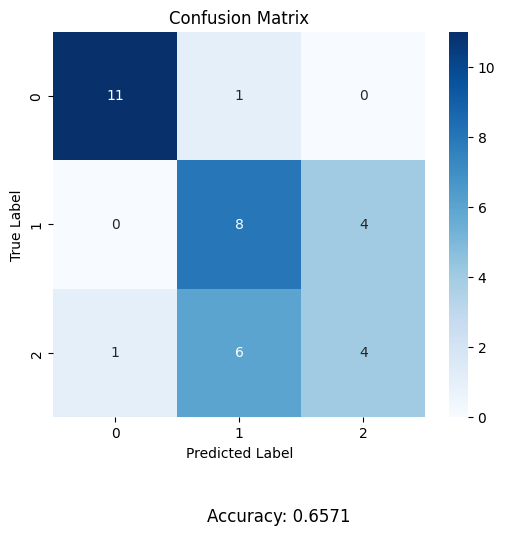

In [3]:
classifier_test(ae, *load(subdirs=["CN","MCI","AD"], take=30, train_test_split=0.6))

The accuracy is still surprisingly high, almost twice as high as random chance, and the trained classifier on the latent space is exceedingly good at classifying the 0 (healthy) case from the others. Let's take a look at the latent space, and see if we can observer clustering!

In [14]:
%pip uninstall umap
%pip install umap-learn


^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\PieHu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


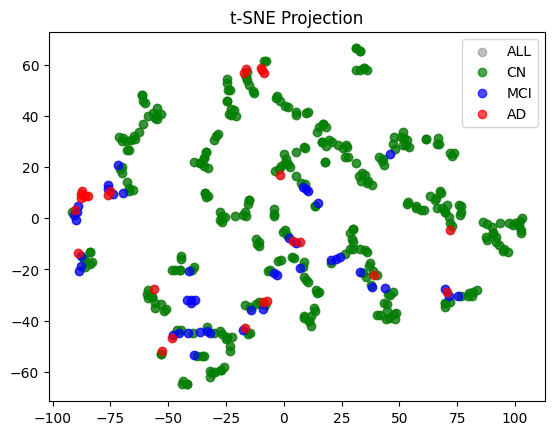

In [ ]:
from sklearn.manifold import TSNE, Isomap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Function to plot t-SNE projection
def pTSNE(model, datasets, colors, labels, ax, perplexity=5, title="t-SNE Projection"):
    """
    Plots the t-SNE projection of the encoded representation of the dataset.

    Parameters:
    - model: The model used for encoding the dataset.
    - dataset: The dataset to be encoded and projected.
    - color: The color used for the scatter plot.
    - label: The label for the dataset in the legend.
    - perplexity: The perplexity parameter for t-SNE (default is 5).
    - title: The title for the plot (default is 't-SNE Projection').
    """
    combined_data = np.concatenate(datasets, axis=0)
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    z_mean = model.encoder.predict(combined_data_scaled)
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    
    
    r = tsne.fit_transform(z_mean)
    ax.scatter(r[:, 0], r[:, 1], color="gray", label="ALL", alpha=0.5)
    
    start_idx = 0
    for dataset, color, label in zip(datasets, colors, labels):
        end_idx = start_idx + len(dataset)
        ax.scatter(r[start_idx:end_idx, 0], r[start_idx:end_idx, 1], 
                   color=color, label=label, alpha=0.7)
        start_idx = end_idx


    ax.set_title(title)
    ax.legend()

fig, ax = plt.subplots()
labels = ["CN", "MCI", "AD"]
colors = ["g","b","r"] # What Kiran used
datasets = [load(f"Pre-processed/{label}", train_test_split=1) for label in labels]
pTSNE(ae, datasets, colors, labels, ax)

Gonna change the structure a bit so we can get better gradients because this does not make any sense

In [23]:
from tensorflow.keras import layers, Model, activations, regularizers
import tensorflow as tf
import os

class AE2:
    def __init__(
            self,
            input_shape,
            hidden_depths:list=[8,16,32,64],
            latent_dim=100,
            output_activation="tanh",
            hidden_activation=activations.leaky_relu,
            l1_lambda=0.0000001  # L1 regularization factor
            ):
        
        shape_changed=False
        if input_shape[-1]>3:
            input_shape = list(input_shape) + [1]
            shape_changed=True
        if len(input_shape)>4:
            input_shape = input_shape[-4:]
            shape_changed=True
        if shape_changed: print(f"Interpreted image shape: {tuple(input_shape)}")

        # Encoder
        encoder_input = x = layers.Input(shape=input_shape)
        for depth in hidden_depths:
            x = layers.Conv3D(
                depth, 
                (3, 3, 3), 
                strides=2, 
                activation=hidden_activation, 
                padding="same",
                activity_regularizer=regularizers.l2(3e-8) # Added regularization to deal with high number of features
                )(x)
            x = layers.Dropout(0.05)(x)
            x = layers.BatchNormalization()(x) # Added batch normalization for better gradients

        # Flatten the latent space
        pre_flatten_shape = x.shape
        print(f"Pre-flattened latent shape: {pre_flatten_shape}")
        x = layers.Flatten()(x)
        encoded = layers.Dense(latent_dim, activation="relu", kernel_regularizer=regularizers.l1(l1_lambda))(x)
        self.encoder = Model(encoder_input, encoded, name="encoder")

        # Decoder
        decoder_input = x = layers.Input(shape=encoded.shape[1:])  # Adjusted latent space shape
        
        # Reshape back to 3D
        x = layers.Dense(
            pre_flatten_shape[1] * pre_flatten_shape[2] * pre_flatten_shape[3] * pre_flatten_shape[4],
            activation="relu",
            kernel_regularizer=regularizers.l1(l1_lambda)
        )(decoder_input)
        x = layers.Reshape(pre_flatten_shape[1:])(x)
        
        for depth in reversed(hidden_depths):
            x = layers.Conv3D(depth, (3, 3, 3), activation=hidden_activation, padding="same")(x)
            x = layers.UpSampling3D((2, 2, 2))(x)  # Single upscale block
        decoded = layers.Conv3D(1, (3, 3, 3), activation=output_activation, padding="same")(x)
        self.decoder = Model(decoder_input, decoded, name="decoder")

        # Full Autoencoder (combine encoder and decoder)
        autoencoder_input = encoder_input
        autoencoder_output = self.decoder(self.encoder(encoder_input))
        self.autoencoder = Model(autoencoder_input, autoencoder_output, name="autoencoder")

        # Compile the autoencoder
        self.autoencoder.compile(loss='mean_squared_error', optimizer='adam')
        self.autoencoder.summary()
        
        self.history = None

    def train(self, x_train, epochs=2, batch_size=16,verbose=True):
        self.history = self.autoencoder.fit(
            x_train, x_train,
            verbose=verbose,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=True,
            validation_split=0.2
        )
        return self.history

    def encode(self, x):
        """Encode input data x into its latent space representation."""
        return self.encoder.predict(x)

    def decode(self, y):
        """Decode latent space representation y into the original data space."""
        return self.decoder.predict(y)
    
    def save(self, path):
        """Save the autoencoder, encoder, and decoder models to disk."""
        os.makedirs(path, exist_ok=True)
        self.autoencoder.save(os.path.join(path, "autoencoder.keras"))
        self.encoder.save(os.path.join(path, "encoder.keras"))
        self.decoder.save(os.path.join(path, "decoder.keras"))
        print(f"Models saved to {path}")
    
    @staticmethod
    def open(path):
        """Load the autoencoder, encoder, and decoder models from disk."""
        autoencoder = tf.keras.models.load_model(os.path.join(path, "autoencoder.keras"))
        encoder = tf.keras.models.load_model(os.path.join(path, "encoder.keras"))
        decoder = tf.keras.models.load_model(os.path.join(path, "decoder.keras"))

        # Create an instance of AE without initializing models
        ae = AE2.__new__(AE2)
        ae.autoencoder = autoencoder
        ae.encoder = encoder
        ae.decoder = decoder

        # Compile the loaded model manually
        ae.autoencoder.compile(loss='mean_squared_error', optimizer='adam')

        print("Models loaded and compiled successfully.")
        return ae

In [24]:
ae = AE2(train.shape)
ae.train(train, epochs = 100)

Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 5, 6, 5, 64)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 100)            │     1,033,492 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     1,153,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,597 (8.34 MB)

 Trainable params: 2,186,357 (8.34 MB)

 Non-trainable params: 240 (960.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 672ms/step - loss: 0.1426 - val_loss: 0.0620
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 642ms/step - loss: 0.0704 - val_loss: 0.0590
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 613ms/step - loss: 0.0417 - val_loss: 0.0579
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - loss: 0.0322 - val_loss: 0.0576
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 637ms/step - loss: 0.0276 - val_loss: 0.0560
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 619ms/step - loss: 0.0241 - val_loss: 0.0564
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 627ms/step - loss: 0.0214 - val_loss: 0.0558
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 602ms/step - loss: 0.0197 - val_loss: 0.0548
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - loss: 0.0193 - val_loss: 0.0556
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - loss: 0.0177 - val_loss: 0.0543
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 651ms/step - loss: 0.0169 - val_loss: 0.0542
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 619ms/step - loss: 0.

In [19]:
ae.save("Trained Models/AE2/100")

Models saved to Trained Models/AE2/100


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


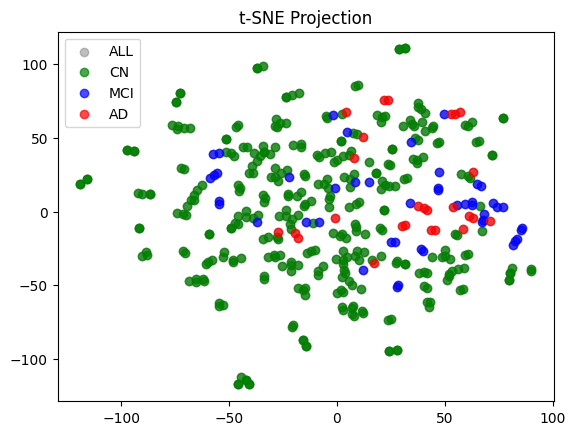

In [25]:
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots()
labels = ["CN", "MCI", "AD"]
colors = ["g","b","r"] # What Kiran used
# datasets = [load(f"Pre-processed/{label}", train_test_split=1) for label in labels]
pTSNE(ae, datasets, colors, labels, ax)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


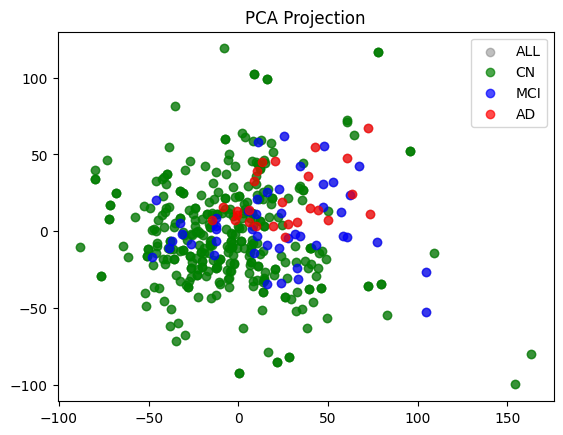

In [32]:

from sklearn.decomposition import PCA
def pPCA(model, datasets, colors, labels, ax, title="PCA Projection"):
    """
    Plots the PCA projection of the encoded representation of the dataset.
    Applies scaling to all datasets combined, ensuring consistent transformation.

    Parameters:
    - model: The model used for encoding the dataset.
    - datasets: List of datasets to be encoded and projected.
    - colors: List of colors used for the scatter plots.
    - labels: List of labels for the datasets in the legend.
    - ax: The axis on which the plot should be drawn.
    - title: The title for the plot (default is 'PCA Projection').
    """
    # Combine all datasets for consistent scaling
    combined_data = np.concatenate(datasets, axis=0)
    scaler = StandardScaler()
    combined_data_scaled = scaler.fit_transform(combined_data.reshape(-1, combined_data.shape[-1])).reshape(combined_data.shape)
    
    # Get the encoded representation of the combined data
    z_mean = model.encoder.predict(combined_data_scaled)

    # Apply PCA on the encoded representation
    pca = PCA(n_components=2)
    points = pca.fit_transform(z_mean)

    ax.scatter(points[:, 0], points[:, 1], color="gray", label="ALL", alpha=0.5)
    
    # Plot the PCA projection for all datasets
    start_idx = 0
    for dataset, color, label in zip(datasets, colors, labels):
        end_idx = start_idx + len(dataset)
        ax.scatter(points[start_idx:end_idx, 0], points[start_idx:end_idx, 1], 
                   color=color, label=label, alpha=0.7)
        start_idx = end_idx

    ax.set_title(title)
    ax.legend()
    return points

fig, ax = plt.subplots()
points = pPCA(ae, datasets, colors, labels, ax)